# Support Vector Machine (SVM)
A support vector machine model is a representation of different classes in a hyperplane in multidimensional space. The hyperplane is generated in an iterative manner by SVM so that the error is minimized. The goal of SVM is to divide the datasets into classes to find a maximum marginal hyperplane (MMH). 

### Import Concepts in SVM
#### Support Vectors
- Datapoints that are closest to the hyperplane are called support vectors
- The separating line will be defined with the help of these datapoints

#### Hyperplane
- A decision plane or space which is divided between a set of objects having a different class

#### Margin
- The gap between two linees on the closest data points of different classes
- It is calculated as the perpendicular distance from the line to the support vectors
- Larger margins are better
    
### How It Works
SVM divides datasets into classes to find a maximum marginal hyperplane (MMH) in two steps:
1. Generate hyperplanes iteratively that segregate classes
2. Choose the hyperplane that seperates the classes correctly

## [Mathematic Example](https://medium.com/@ankitnitjsr13/math-behind-support-vector-machine-svm-5e7376d0ee4d)
Below is an example of linear SVM done mathematically. The hyperplane with the highest margin will be chosen to perform classifications in the future. 

(-1.0, 3.5)

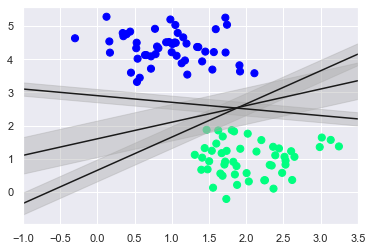

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns # data visualization library based on matplotlib

sns.set()

from sklearn.datasets.samples_generator import make_blobs # load sample data
# X is an array of cartesian coordinates, y is a binary value associated with each array
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.50)
xfit = np.linspace(-1, 3.5) # returns evenly spaced numbers over the specified interval
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter') # create the scatter plot
# the below plots the lines and approximate margin areas for demonstration
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, .55), (-0.2, 2.9, 0.2)]: 
   yfit = m * xfit + b
   plt.plot(xfit, yfit, '-k')
   plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5)

## Using Scikit-Learn's [Support Vector Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
The next example works against the same dataset, but instead uses the sklearn support vector classifier object. This example demonstrates the use of the linear kernel.

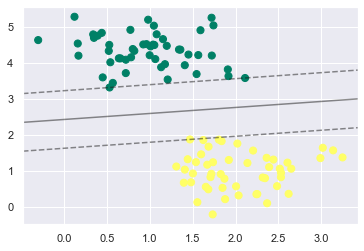

In [31]:
from sklearn.svm import SVC # Support vector classifier

model = SVC(kernel='linear',C=1E10)
model.fit(X, y)

def decision_function(model, ax=None, plot_support=True):
    """
    Plots the optimal hyperplane according to the model SVC model inputted.
    
    :inputs:
    model - sklearn.svm.SVC type object
    ax - matplotlib.axes.Axes object
    plot_support - boolean indicating whether or not to plot these values
    
    :returns:
    No objects explicitly returned. Plots the curves of the hyperparameters
    of the model inputted on the inputted or existing matplotlib object
    """
    if ax is None: # create Axes if none have already been created
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # Return coordinate matrices from coordinate vectors
    xy = np.vstack([X.ravel(), Y.ravel()]).T # .ravel returns a flattened array
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors='k', # draws the dashed and solid contour lines seen below. 
       levels=[-1, 0, 1], alpha=0.5,
       linestyles=['--', '-', '--'])  
    if plot_support:
       ax.scatter(model.support_vectors_[:, 0],
          model.support_vectors_[:, 1],
          s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
decision_function(model)

## SVM Kernels
In practice the SVM algorithm is implemented with a kernel that transforms an input data space into the required form. SVM uses a technique called the kernel trick in which a kernel takes a low dimensional input space and transforms it into a higher dimensional space. 

This means that the kernel converts non-seperable problems into seperable problems by adding more dimensions to it. 

### Kernels available in the Support Vector Classifier
#### Linear Kernel
It can be used as a dot product between any two observations. The formula of a linear kernel is as follows:

> K(x, xi) = sum(x * xi)

Fromt he above formula, we see that the product between two vators (in this case x and xi) is the sum of the multiplication of each pair of input values. 

#### Polynomial Kernel
It is a more generalized form of linear kernel and distinguishes curved or nonlinear input space. This is the formula of the polynomial kernel:

> K(x, xi) = 1 + sum(x * xi) ^ d

Here d is the degree of the polynomial, which we need to specify manually in the learning algorithm. 

#### Radial Basis Function Kernel
RBF kernel is mostly used in SVM classification models. It maps the input space in indefinite dimensioal space. 

> K(x, xi) exp(-gamma * sum(((x - xi^2))

Here, gamma ranges from 0 to 1. We need to manually specify it in the learning algorithm. A good default value of gamma is 0.1.

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Support Vector Classifier with linear kernel')

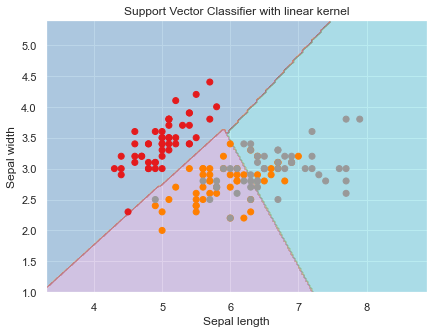

In [44]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

print(type(X))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
   np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

C = 1.0

svc_classifier = svm.SVC(kernel='linear', C=C).fit(X, y)
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with linear kernel')

Text(0.5, 1.0, 'Support Vector Classifier with rbf kernel')

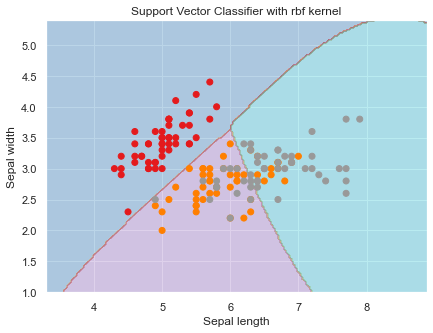

In [43]:
svc_classifier = svm.SVC(kernel='rbf', gamma =.2,C=C).fit(X, y)
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('Support Vector Classifier with rbf kernel')

## Calculating the Performance of an SCM Model
